In [141]:
using Pkg
Pkg.activate("../")

using Base.Filesystem

# This is to read wav files.
# See: https://github.com/dancasimiro/WAV.jl
using WAV
using Plots

using Revise
using SpeechFeatures

 Activating environment at `~/GithubRepositories/SpeechFeatures/Project.toml`


Download an example audio file from the TIMIT 
corpus.

In [142]:
if ! isfile("LDC93S1.wav")
    run(`wget https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav`)
end

Load the audio file

sampling freq: 16000.0 Hz
duration: 2.92 s


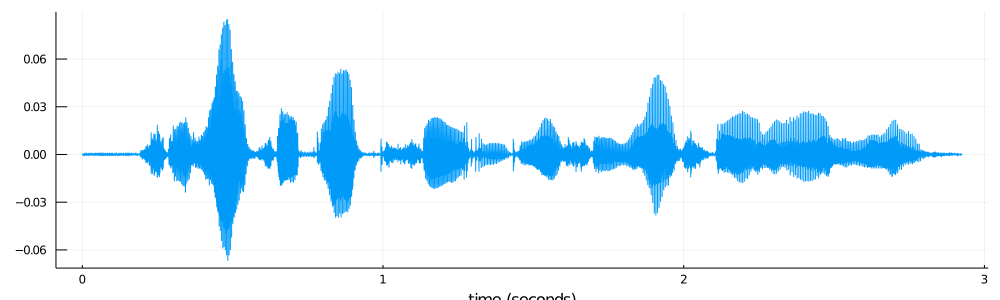

In [143]:
channels, srate = wavread("LDC93S1.wav", format="double")

# TIMIT data has only one channel (i.e. "mono") 
x = channels[:, 1]

println("sampling freq: $srate Hz\nduration: $(round(length(x) / srate, digits=2)) s")

t = range(0, length(x) / srate, length=length(x))
plot(t, x, size=(1000, 300), xlabel="time (seconds)", legend = false)

39×290 Array{Float64,2}:
 -6.03465    -5.81984    -5.82006   …   -3.90087      -4.30974
 -7.39678    -9.09593    -9.8006        -6.37313      -6.82817
  3.51095     1.34809     2.51961       -9.8926      -10.2929
 -6.0225     -5.5038     -5.69009      -11.6388       -9.26787
  7.24394     7.2855     13.55           5.62765       3.95786
  0.0650645  -1.3078      8.17598   …    3.6436        3.49493
  0.566131    5.28969     6.7148         2.54236       4.87025
  4.67464     6.34158     8.08317        3.29046       1.50601
  3.59283     6.97979     2.63235       -1.83413      -1.58188
  5.59618     9.47443     0.45892        7.13281      10.3621
 -2.62696     1.2159     -7.3962    …  -13.8757      -10.4428
  5.57438    10.4084      4.94312       -2.92467       3.43407
 -3.93071     2.87547    -3.28759       -7.80681     -10.9504
  ⋮                                 ⋱                
  0.0131504   0.389689    0.805017       0.0167074     0.0214087
  0.0836206   0.0545099  -0.177561      -

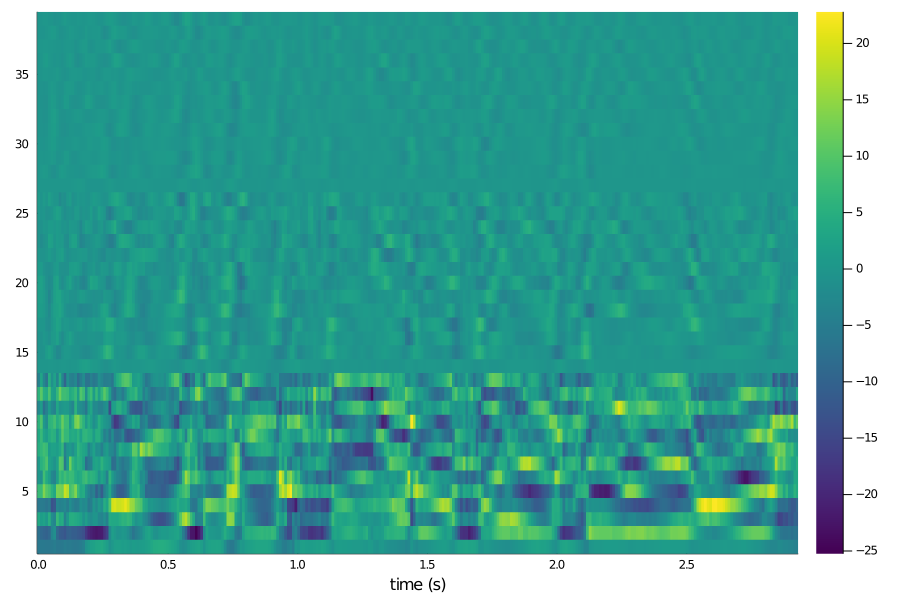

In [157]:
mfcc = MFCC(srate = 16000) # Standard MFCC features 
Δ_ΔΔ = DeltaCoeffs(order = 2) # Add first and second order "derivatives" to the features
mnorm = MeanNorm() # Remove the utterance mean
fea = x |> mfcc |> Δ_ΔΔ |> mnorm

heatmap(
    Vector(range(0, length(x) / srate, length = length(fea))),
    1:length(fea[1]),
    hcat(fea...),
    size = (900, 600),
    xlabel = "time (s)",
    c = :viridis
)

In [ ]:
fea = hcat(fea...)
heatmap(
    Vector(range(0, length(x) / srate, length=size(fea, 2))),
    1:size(fea, 1),
    fea,
    size = (900, 200),
    xlabel = "time (s)",
    ylabel = "FFT bin",
    c = :viridis
)

In [140]:
magspec = MFCC()
Δ_ΔΔ = DeltaCoeffs()
mnorm = MeanNorm()
fea = x |> magspec |> Δ_ΔΔ |> mnorm

μ = sum(fea) ./ length(fea)


39-element Array{Float64,1}:
  1.4394615767553753e-15
 -7.350442094070002e-16
 -5.145309465849001e-15
  1.724291207900588e-15
  1.5190913661078005e-15
 -3.748725467975701e-15
 -6.982919989366502e-16
  3.264821363449426e-15
 -5.298443676142126e-16
  8.269247355828752e-16
  5.941607359373252e-16
 -4.517459203647189e-15
 -5.175936307907627e-16
  ⋮
  2.608067019054786e-17
  2.3209403747551763e-17
  1.3016407874915628e-17
  6.460349496741213e-19
 -6.029659530291798e-18
 -9.762305906186721e-18
 -8.159182142180569e-18
 -6.029659530291798e-18
 -1.6270509843644534e-17
  9.762305906186721e-18
 -2.8712664429960945e-18
  1.674905425081055e-19

In [ ]:
fea = hcat(fea...)
heatmap(
    range(0, length(x) / srate, length=size(fea, 2)),
    1:size(fea, 1),
    fea,
    size = (1000, 600),
    xlabel = "time (s)",
    ylabel = "FFT bin",
    c = :viridis
)

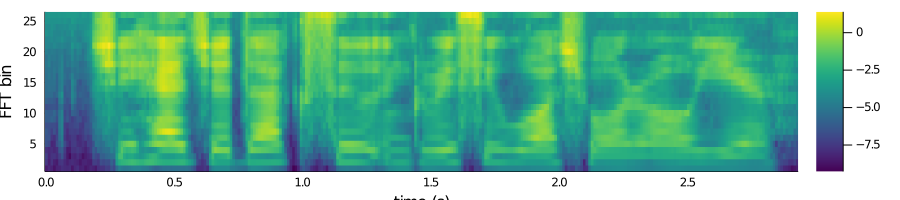

In [110]:
fea = [F'] .* (x |> preprocessor |> framing .|> fft .|> x -> log.(x)
fea = hcat(fea...)
heatmap(
    Vector(range(0, length(x) / srate, length=size(fea, 2))),
    1:size(fea, 1),
    fea,
    size = (900, 200),
    xlabel = "time (s)",
    ylabel = "FFT bin",
    c = :viridis
)

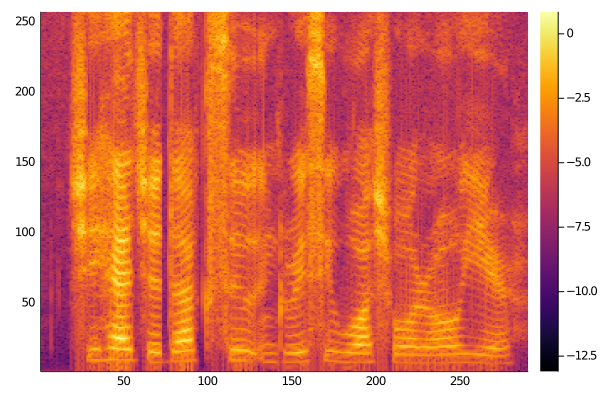

In [31]:
X = x |> stft .|> abs .|> log
heatmap(X)

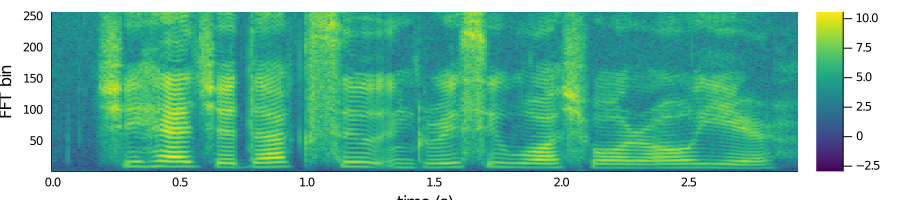

In [7]:
lms = LogMagnitudeSpectrum(
    fftlen = fftlen_auto,
    srate = 16000,
    frameduration = 0.025,
    framestep = 0.01,
    removedc = true,
    preemphasis = 0.97,
    dithering = 0.,
    windowfn = hann,
    windowpower = 1.0
)
fea = x |> lms

heatmap(
    Vector(range(0, length(x) / srate, length=size(fea, 2))),
    1:size(fea, 1),
    fea,
    size = (900, 200),
    xlabel = "time (s)",
    ylabel = "FFT bin",
    c = :viridis
)

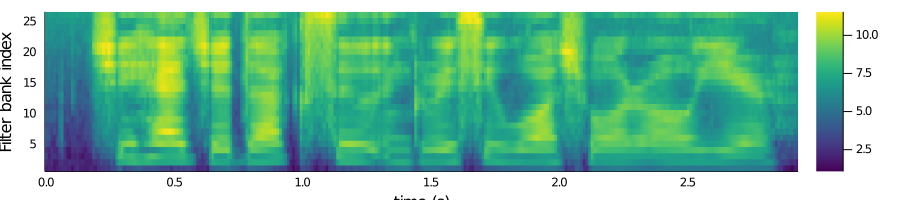

In [8]:
logfbank = LogMelSpectrum(
    fftlen = fftlen_auto,
    srate = 16000,
    frameduration = 0.025,
    framestep = 0.01,
    removedc = true,
    preemphasis = 0.97,
    dithering = 0.,
    windowfn = hann,
    windowpower = 1.0,
    nfilters = 26,
    lofreq = 80,
    hifreq = 8000
)
fea = x |> logfbank

heatmap(
    Vector(range(0, length(x) / srate, length=size(fea, 2))),
    1:size(fea, 1),
    fea,
    size = (900, 200),
    xlabel = "time (s)",
    ylabel = "Filter bank index",
    c = :viridis
)

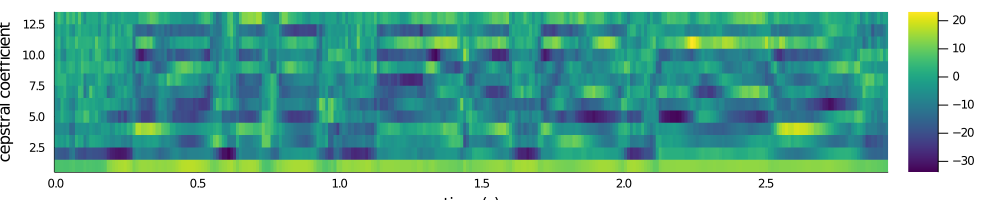

In [9]:
mfcc = MFCC(
    T = Float32, # Default is Float64
    fftlen = fftlen_auto,
    srate = 16000,
    frameduration = 0.025,
    framestep = 0.01,
    removedc = true,
    preemphasis = 0.97,
    dithering = 0.,
    windowfn = hann,
    windowpower = 0.85,
    nfilters = 26,
    lofreq = 80,
    hifreq = 8000,
    nceps = 12,
    liftering = 22, 
    htkscaling = true,
    energy = rawenergy,
    energyfloor = 0.,
)
fea = x |> mfcc

heatmap(
    range(0, length(x) / srate, length=size(fea, 2)),
    1:size(fea, 1),
    fea,
    size = (1000, 200),
    xlabel = "time (s)",
    ylabel = "cepstral coefficient",
    c=:viridis
)

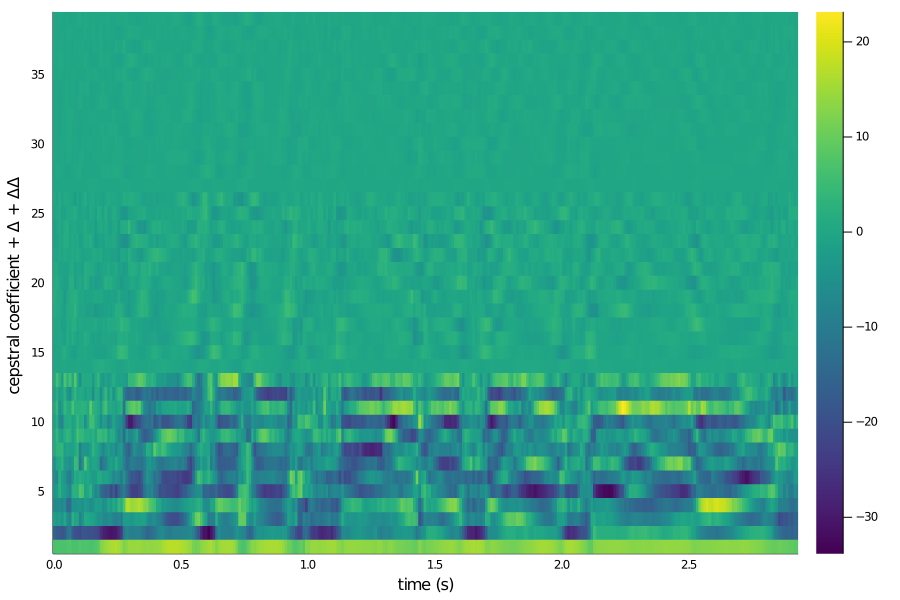

In [10]:
Δ_ΔΔ = DeltaCoeffs(
    order = 2, 
    win = 2
)
fea_Δ_ΔΔ = fea |> Δ_ΔΔ

heatmap(
    Vector(range(0, length(x) / srate, length=size(fea_Δ_ΔΔ, 2))),
    1:size(fea_Δ_ΔΔ, 1),
    fea_Δ_ΔΔ,
    size = (900, 600),
    xlabel = "time (s)",
    ylabel = "cepstral coefficient + Δ + ΔΔ ",
    c=:viridis
)